In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv3D, Conv3DTranspose, LeakyReLU
from tensorflow.keras.models import Sequential
import numpy as np

# What kind of data are we working with?

In [2]:


# List all physical devices of type 'GPU'
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    print(f'Number of GPUs available: {len(gpus)}')
    for i, gpu in enumerate(gpus):
        print(f'GPU {i}: {gpu}')
else:
    print('No GPU detected.')




Number of GPUs available: 1
GPU 0: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
t1_img_test = nib.load("4D\A00000300_0011_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz")
t2 = nib.load('4D\A00037238_0012_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz')

In [4]:
print(t1_img_test.shape)
print(t2.shape)

(91, 109, 91, 146)
(91, 109, 91, 136)


In [5]:
t1_data = t1_img_test.get_fdata()
t1_data

array([[[[100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         ...,
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.]],

        [[100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         ...,
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.]],

        [[100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         ...,
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.]],

        ...,

  

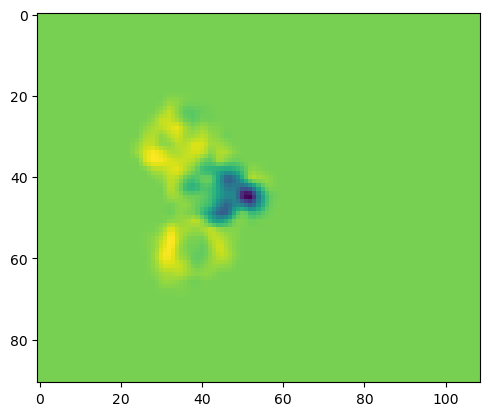

In [6]:
imgplot = plt.imshow(t1_data[:, :, 2, 1])

In [7]:
import glob
import nibabel as nib
import os

# Specify the directory and file pattern
directory_path = '4D'
file_pattern = 'A*_????_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz'

# Construct the full path pattern
path_pattern = f'{directory_path}/{file_pattern}'

# Use glob to find all matching files
matching_files = glob.glob(path_pattern)

# Define the list of schizophrenia IDs

schizophrenia_ids = [
    'A00009280', 'A00028806', 'A00023132', 'A00014804', 'A00016859']

'''
schizophrenia_ids = [
    'A00009280', 'A00028806', 'A00023132', 'A00014804', 'A00016859', 'A00021598', 'A00001181', 'A00023158', 'A00024568', 'A00028405',
    'A00001251', 'A00000456', 'A00015648', 'A00002405', 'A00027391', 'A00016720', 'A00018434', 'A00016197', 'A00027119', 'A00006754',
    'A00009656', 'A00038441', 'A00012767', 'A00034273', 'A00028404', 'A00035485', 'A00024684', 'A00018979', 'A00027537', 'A00004507',
    'A00001452', 'A00023246', 'A00027410', 'A00014719', 'A00024510', 'A00000368', 'A00019293', 'A00014830', 'A00015201', 'A00018403',
    'A00037854', 'A00024198', 'A00001243', 'A00014590', 'A00002337', 'A00024953', 'A00037224', 'A00027616', 'A00001856', 'A00037619',
    'A00024228', 'A00038624', 'A00037034', 'A00037649', 'A00022500', 'A00013216', 'A00020787', 'A00028410', 'A00002480', 'A00028303',
    'A00020602', 'A00024959', 'A00018598', 'A00014636', 'A00019349', 'A00017147', 'A00023590', 'A00023750', 'A00031597', 'A00015518',
    'A00018317', 'A00016723', 'A00021591', 'A00023243', 'A00017943', 'A00023366', 'A00014607', 'A00020414', 'A00035003', 'A00028805',
    'A00029486', 'A00000541', 'A00028408', 'A00000909', 'A00031186', 'A00000838'
] '''


# Define the list of IDs of individuals with non-schizophrenia



non_schizophrenia_ids = [
    'A00007409', 'A00013140', 'A00021145', 'A00036049', 'A00022810']

'''
non_schizophrenia_ids = [
    'A00007409', 'A00013140', 'A00021145', 'A00036049', 'A00022810', 'A00002198', 'A00020895', 'A00004667', 'A00015826', 'A00023120',
    'A00022837', 'A00010684', 'A00009946', 'A00037318', 'A00033214', 'A00022490', 'A00023848', 'A00035859', 'A00029452', 'A00037564',
    'A00036555', 'A00023095', 'A00022729', 'A00024955', 'A00024160', 'A00011725', 'A00028402', 'A00027487', 'A00024446', 'A00014898',
    'A00015759', 'A00033994', 'A00028409', 'A00031271', 'A00017294', 'A00014522', 'A00012995', 'A00031764', 'A00025969', 'A00033147',
    'A00018553', 'A00023143', 'A00036916', 'A00028052', 'A00023337', 'A00023730', 'A00020805', 'A00020984', 'A00000300', 'A00010150',
    'A00024932', 'A00014175', 'A00035537', 'A00022509', 'A00033812', 'A00028406', 'A00034381', 'A00004087', 'A00035751', 'A00023800',
    'A00027787', 'A00035836', 'A00022687', 'A00023866', 'A00021085', 'A00022619', 'A00036897', 'A00019888', 'A00021058', 'A00022835',
    'A00021432', 'A00033749', 'A00037495', 'A00026945', 'A00018716', 'A00028189', 'A00019750', 'A00026907', 'A00023330', 'A00033686',
    'A00016199', 'A00027755', 'A00037238', 'A00023131', 'A00014120', 'A00021072', 'A00027969', 'A00033715', 'A00037665', 'A00011107',
    'A00022400', 'A00003150', 'A00024372', 'A00021081', 'A00038172', 'A00033648', 'A00022592', 'A00022653', 'A00013816', 'A00014839',
    'A00031478', 'A00014225', 'A00013363', 'A00034214', 'A00037007', 'A00020968', 'A00024301', 'A00024820', 'A00035469', 'A00029226',
    'A00022915', 'A00035183', 'A00022773', 'A00024663', 'A00036844', 'A00009207', 'A00024535', 'A00022727', 'A00011265', 'A00020416',
    'A00024546', 'A00028403'
] '''

'''
# Initialize a list to store the processed data
schizophrenia_data = []
non_schizophrenia_data = []

# Loop through the matching files
for file_path in matching_files:
    # Extract the filename (assuming the IDs are part of the filename)
    filename = os.path.basename(file_path)
    
    # Extract the ID from the filename
    file_id = filename.split('_')[0]
    
    # Check if the ID is in the list of schizophrenia IDs
    if file_id in schizophrenia_ids:
        # Load and process the file as needed
        print('schizophrenia_ids', file_id)
        t1_img = nib.load(file_path)
        t1_data = t1_img.get_fdata()
        
        # Append the image data to the all_data list
        schizophrenia_data.append(t1_data)
    elif file_id in non_schizophrenia_ids:
        print('non-schizophrenia_ids', file_id)
        t1_img = nib.load(file_path)
        t1_data = t1_img.get_fdata()
        
        # Append the image data to the non_schizophrenia_data list
        non_schizophrenia_data.append(t1_data)

    

# Now, all_data contains the image data for individuals with schizophrenia '''


"\n# Initialize a list to store the processed data\nschizophrenia_data = []\nnon_schizophrenia_data = []\n\n# Loop through the matching files\nfor file_path in matching_files:\n    # Extract the filename (assuming the IDs are part of the filename)\n    filename = os.path.basename(file_path)\n    \n    # Extract the ID from the filename\n    file_id = filename.split('_')[0]\n    \n    # Check if the ID is in the list of schizophrenia IDs\n    if file_id in schizophrenia_ids:\n        # Load and process the file as needed\n        print('schizophrenia_ids', file_id)\n        t1_img = nib.load(file_path)\n        t1_data = t1_img.get_fdata()\n        \n        # Append the image data to the all_data list\n        schizophrenia_data.append(t1_data)\n    elif file_id in non_schizophrenia_ids:\n        print('non-schizophrenia_ids', file_id)\n        t1_img = nib.load(file_path)\n        t1_data = t1_img.get_fdata()\n        \n        # Append the image data to the non_schizophrenia_data lis

In [8]:
#non_schizophrenia_data

In [10]:
#schizophrenia_data

In [11]:
# Initialize lists to store the processed image data and corresponding labels
image_data = []
labels = []  # 1 for schizophrenia, 0 for non-schizophrenia

# Loop through the matching files
for file_path in matching_files:
    # Extract the filename
    filename = os.path.basename(file_path)
    
    # Extract the ID from the filename
    file_id = filename.split('_')[0]
    
    # Determine the label based on the ID
    if file_id in schizophrenia_ids:
        label = 1  # Schizophrenia
    elif file_id in non_schizophrenia_ids:
        label = 0  # Non-Schizophrenia
    else:
        continue  # Skip files with IDs not in the provided lists
    
    # Load and process the file as needed
    t1_img = nib.load(file_path)
    t1_data = t1_img.get_fdata()
    
    # Append the image data and label to the respective lists
    image_data.append(t1_data)
    labels.append(label)


In [12]:
image_data

[array([[[[100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          ...,
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.]],
 
         [[100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          ...,
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.]],
 
         [[100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          ...,
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 100.],
          [100., 100., 100., ..., 100., 100., 10

In [13]:
len(image_data)

7

In [14]:
labels

[0, 1, 0, 1, 0, 1, 0]

In [28]:
def build_generator(z_dim):
    model = Sequential()
    model.add(Dense(13310, input_dim=z_dim))
    #2725888
    #model.add(Dense(2725888, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Reshape((11, 11, 11, 10)))  
    model.add(Conv3DTranspose(64, kernel_size=3, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Conv3DTranspose(32, kernel_size=3, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Conv3DTranspose(10, kernel_size=3, strides=2, padding='same', activation='tanh'))
    return model


def build_discriminator(img_shape):
    model = Sequential()
    model.add(Conv3D(32, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(10, activation='sigmoid'))
    return model


# Build and compile the generator
generator = build_generator(100)
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Build and compile the discriminator
discriminator = build_discriminator((88, 88, 88, 10))
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [30]:
def build_gan(generator, discriminator):
    model = Sequential()
    discriminator.trainable = False  # Freeze the discriminator during the generator's training
    model.add(generator)
    model.add(discriminator)
    return model

# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')



AttributeError: 'list' object has no attribute 'shape'

In [31]:
def train_gan(gan, generator, discriminator, data, labels, z_dim, batch_size, epochs):
    for epoch in range(epochs):
        for _ in range(data.shape[0] // batch_size):
            # Get a random batch of real images and their corresponding labels
            idx = np.random.randint(0, data.shape[0], batch_size)
            real_imgs, real_labels = data[idx], labels[idx]
            
            # Generate a batch of fake images
            noise = np.random.normal(0, 1, (batch_size, z_dim))
            fake_imgs = generator.predict(noise)
            
            # Labels for fake images
            fake_labels = np.zeros((batch_size, 1))
            
            # Train the discriminator
            d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            # Train the generator
            noise = np.random.normal(0, 1, (batch_size, z_dim))
            valid_y = np.ones((batch_size, 1))  # Label smoothing could be used here
            g_loss = gan.train_on_batch(noise, valid_y)
            
            # Print the progress
            print(f"{epoch}/{epochs}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
            
        # (Optional) Save generated images, models, etc., at certain intervals

# Call the function to train the GAN
train_gan(gan, generator, discriminator, image_data, labels, z_dim=100, batch_size=32, epochs=10)


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
schizophrenia_data

In [ ]:
all_data

In [ ]:
all_data

In [ ]:
all_data.len()

In [ ]:
t1_data.max

In [ ]:
t1_data.shape

In [ ]:
t1_data[9, 19, 2]

In [ ]:
t1_ex1 = t1_data[9, 19, 2]

In [ ]:
t1_ex1.shape

In [ ]:
imgplot = plt.imshow(t1_data[:, :, 2, 1])

In [ ]:
t1_time1 = t1_data[:, :, :, 1]

In [ ]:
t1_time1.shape

In [ ]:
imgplot = plt.imshow(t1_data[:, :, 32, 2])